# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

# Load the data

In [2]:
data = pd.read_excel("1st_Phase_-_Selective_Process_-_Data_Science_-_DataBase.xlsx", index_col = 0)

#verificando as features presentes no dataframe
print(data.columns)

data.head()

Index(['EDUCAÇÃO', 'CARGO', 'LOCAL', 'IDADE', 'TEMPOCASA', 'SALARIO_MENSAL'], dtype='object')


,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO_MENSAL
ID,,,,,,
1.0,SECUNDÁRIO,GERENTE,INTERIOR,30.0,1.0,4279.5
2.0,SUPERIOR,AUXILIAR,INTERIOR,32.0,4.0,4575.4
3.0,SECUNDÁRIO,AUXILIAR,CAPITAL,33.0,2.0,4735.6
4.0,SUPERIOR,GERENTE,INTERIOR,34.0,3.0,4863.1
5.0,SECUNDÁRIO,GERENTE,INTERIOR,36.0,1.0,5355.8


# Exploration

In [3]:
#Learning the dtypes of columns' and how many non-null values are there in those columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 80 entries, 1.0 to 82.0
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDUCAÇÃO        80 non-null     object 
 1   CARGO           80 non-null     object 
 2   LOCAL           80 non-null     object 
 3   IDADE           80 non-null     float64
 4   TEMPOCASA       80 non-null     float64
 5   SALARIO_MENSAL  80 non-null     float64
dtypes: float64(3), object(3)
memory usage: 4.4+ KB


In [4]:
#Getting the statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IDADE,80.0,49.7500,9.594962,30.0,43.75,49.00,56.0,72.0
TEMPOCASA,80.0,10.8875,7.401665,0.0,3.75,12.50,17.0,25.0
SALARIO_MENSAL,80.0,5777.6225,1138.187752,4186.6,4894.30,5673.45,6306.3,12465.8


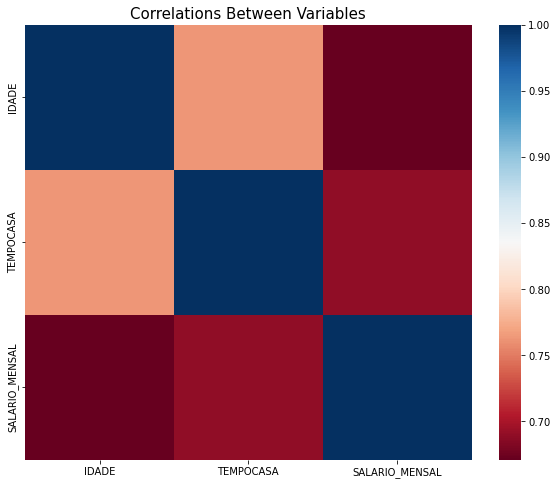

In [5]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [6]:
#We are selecting numerical features which have more than 0.50 correlation
important_num_cols = list(data.corr()["SALARIO_MENSAL"][(data.corr()["SALARIO_MENSAL"]>0.50) | (data.corr()["SALARIO_MENSAL"]<-0.50)].index)
cat_cols = ['EDUCAÇÃO', 'CARGO', 'LOCAL']
important_cols = important_num_cols + cat_cols

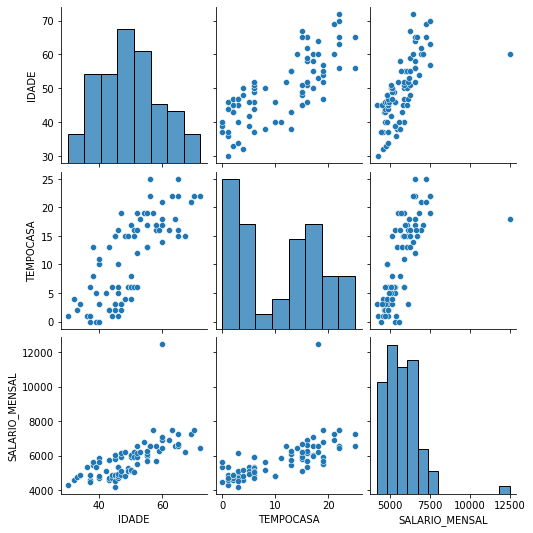

In [7]:
#Visualizing the Correlation between the numerical variables using pairplot visualization
sns.pairplot(data[important_num_cols]);

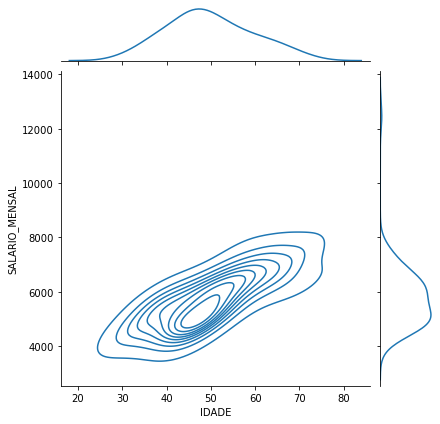

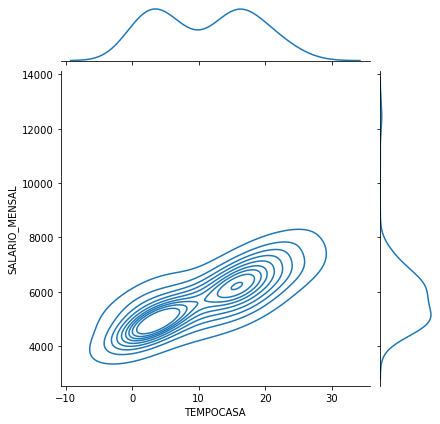

In [8]:
#Visualizing the Correlation between each column and the target variable using jointplot visualization
sns.jointplot(x=data["IDADE"], y=data["SALARIO_MENSAL"], kind="kde")
sns.jointplot(x=data["TEMPOCASA"], y=data["SALARIO_MENSAL"], kind="kde")
plt.show()

# X, y Split

In [9]:
#Splitting the data into X and y chunks
X = data.drop("SALARIO_MENSAL", axis=1)
y = data["SALARIO_MENSAL"]

# One-Hot Encoding

In [10]:
#Encoding the categorical features in X dataset by using One-Hot Encoding method
X = pd.get_dummies(X, columns=cat_cols)

# Standardizing the Data

In [11]:
#Standardizing the numerical columns in X dataset
#StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1

important_num_cols.remove("SALARIO_MENSAL")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [12]:
X.head()

,IDADE,TEMPOCASA,EDUCAÇÃO_SECUNDÁRIO,EDUCAÇÃO_SUPERIOR,CARGO_AUXILIAR,CARGO_DIRETOR,CARGO_GERENTE,LOCAL_CAPITAL,LOCAL_INTERIOR
ID,,,,,,,,,
1.0,-2.071359,-1.344276,1,0,0,0,1,0,1
2.0,-1.861601,-0.936405,0,1,1,0,0,0,1
3.0,-1.756722,-1.208319,1,0,1,0,0,1,0
4.0,-1.651843,-1.072362,0,1,0,0,1,0,1
5.0,-1.442085,-1.344276,1,0,0,0,1,0,1


# Train-Test Split

In [13]:
#Splitting the data into Train and Test chunks for better evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Defining several evaluation functions for convenience

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Machine Learning Models

In [15]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Linear Regression

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 678.8996859534302
MSE: 2131314.7557464126
RMSE: 1459.9023103435422
R2 Score: 0.43112629382139245
------------------------------
RMSE Cross-Validation: 649.2764740379323


# Ridge Regression

In [17]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 690.0776102417602
MSE: 2162322.701194841
RMSE: 1470.4838323473132
R2 Score: 0.42284989785469074
------------------------------
RMSE Cross-Validation: 650.4418868888682


# Lasso Regression

In [18]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 680.9050891657787
MSE: 2138901.6219663196
RMSE: 1462.4984177654073
R2 Score: 0.4291012673943182
------------------------------
RMSE Cross-Validation: 649.856442523463


# Elastic Net

In [19]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 800.1292451761046
MSE: 2507735.240195644
RMSE: 1583.583038617061
R2 Score: 0.33065511025132976
------------------------------
RMSE Cross-Validation: 702.8879067118809


# Support Vector Machines

In [20]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 745.8463648754971
MSE: 2260205.1589928446
RMSE: 1503.39787115482
R2 Score: 0.3967238850791067
------------------------------
RMSE Cross-Validation: 938.5892547822841


# Random Forest Regressor

In [21]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 726.8050624999983
MSE: 2329525.3892859314
RMSE: 1526.278280421343
R2 Score: 0.37822147654763083
------------------------------
RMSE Cross-Validation: 720.3685439571129


# XGBoost Regressor

In [22]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 692.5923461914062
MSE: 2365764.640163675
RMSE: 1538.1042357927745
R2 Score: 0.36854878184105355
------------------------------
RMSE Cross-Validation: 747.6890404098871


# Polynomial Regression (Degree=2)

In [23]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 840.03125
MSE: 2227564.2506249994
RMSE: 1492.502680273975
R2 Score: 0.40543613861471817
------------------------------
RMSE Cross-Validation: 649.2764740379323


# Model Comparison

In [24]:
#The less the Root Mean Squared Error (RMSE), The better the model is.
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,678.899686,2.131315e+06,1459.902310,0.431126,649.276474
7,Polynomial Regression (degree=2),840.031250,2.227564e+06,1492.502680,0.405436,649.276474
2,Lasso,680.905089,2.138902e+06,1462.498418,0.429101,649.856443
1,Ridge,690.077610,2.162323e+06,1470.483832,0.422850,650.441887
3,ElasticNet,800.129245,2.507735e+06,1583.583039,0.330655,702.887907
5,RandomForestRegressor,726.805062,2.329525e+06,1526.278280,0.378221,720.368544
6,XGBRegressor,692.592346,2.365765e+06,1538.104236,0.368549,747.689040
4,SVR,745.846365,2.260205e+06,1503.397871,0.396724,938.589255


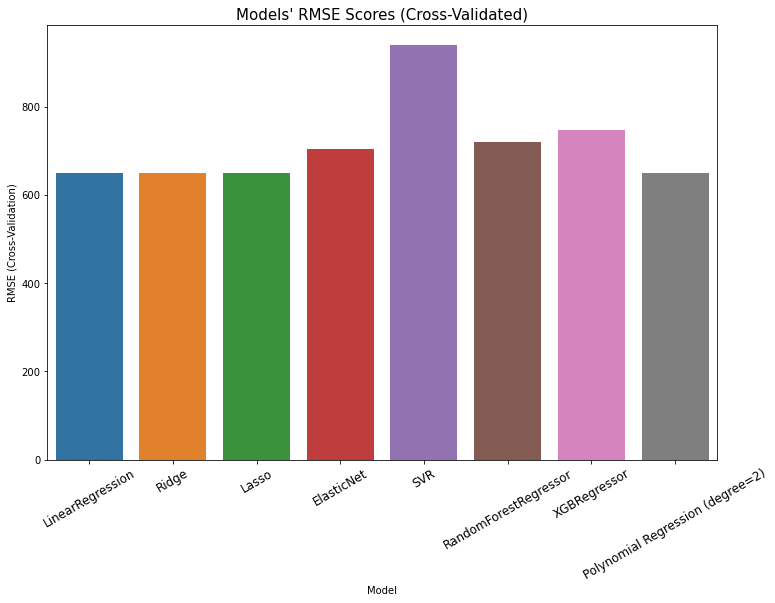

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# Conclusion

The linear regression model is the one that best describes the data, using it to predict the salary of an employee but for the 2 different locations it will be possible to verify if there is a significantly different salary between the locations. 

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Employe with ID = 1 is located at a country city and got the value result1 as prediction of his salary
employe1 = X.loc[:1]

result1 = lin_reg.predict(employe1)

employe.head()

,IDADE,TEMPOCASA,EDUCAÇÃO_SECUNDÁRIO,EDUCAÇÃO_SUPERIOR,CARGO_AUXILIAR,CARGO_DIRETOR,CARGO_GERENTE,LOCAL_CAPITAL,LOCAL_INTERIOR
ID,,,,,,,,,
1.0,-2.071359,-1.344276,1,0,0,0,1,1,0


In [76]:
#Changing the location of the employe with ID = 1 we got result2 as prediction of his salary
employe2 = employe1
employe2.loc[:,'LOCAL_CAPITAL'] = 0
employe2.loc[:,'LOCAL_INTERIOR'] = 1

result2 = lin_reg.predict(employe2)

employe2.head()

C:\Users\SamuelPorto\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,IDADE,TEMPOCASA,EDUCAÇÃO_SECUNDÁRIO,EDUCAÇÃO_SUPERIOR,CARGO_AUXILIAR,CARGO_DIRETOR,CARGO_GERENTE,LOCAL_CAPITAL,LOCAL_INTERIOR
ID,,,,,,,,,
1.0,-2.071359,-1.344276,1,0,0,0,1,0,1


In [77]:
result1/result2

array([0.98124594])

As we can se above, the salary prediction of an employe located at a country city it's bigger than the prediction of the same employe if he was located at a capital city.

But there's a difference of only 2%, showing us that there isn't a significantly salary difference between employes located in different places.